In [1]:
import os

In [2]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt

In [3]:
DataPath = os.path.abspath('./data/txtdata.csv')
DataPath

'/Users/Alum/Documents/WorkSpace/PPBMH_learn/Chapter1/data/txtdata.csv'

In [4]:
figsize(12.5, 3.5)
count_data = np.loadtxt(DataPath)
n_count_data = len(count_data)
n_count_data

74

(0, 74)

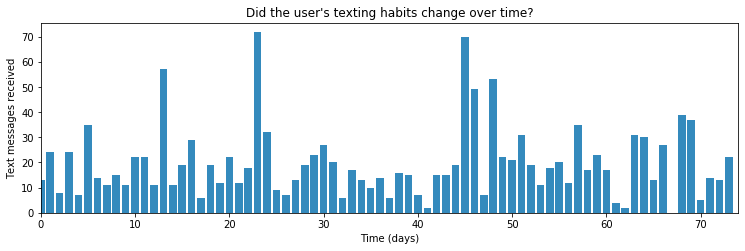

In [5]:
plt.bar(np.arange(n_count_data), count_data, color="#348ABD")
plt.xlabel("Time (days)")
plt.ylabel("Text messages received")
plt.title("Did the user's texting habits change over time?")
plt.xlim(0, n_count_data)

In [8]:
import pymc3 as pm

In [10]:
alpha = 1.0 / count_data.mean()
alpha

0.05065023956194388

In [17]:
with pm.Model() as model:
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data)

In [23]:
print("Random output: ", tau.random(), tau.random(), tau.random())

Random output:  43 23 68


In [28]:
print(model.tau.random())

18


In [32]:
@pm.deterministic 
def lambda_(tau=tau, lambda_1=lambda_1, lambda_2=lambda_2):
    out = np.zeros(n_count_data)
    out[:tau] = lambda_1
    out[tau:] = lambda_2
    
    return out

AttributeError: module 'pymc3' has no attribute 'deterministic'